# Stock prediction using Prophet and Yfinance

In [15]:
# Installing yfinance library
!pip install yfinance

In [17]:
import datetime
from pathlib import Path

import joblib
import pandas as pd
import yfinance as yf
from prophet import Prophet

[*********************100%***********************]  1 of 1 completed


20:39:46 - cmdstanpy - INFO - Chain [1] start processing
20:39:46 - cmdstanpy - INFO - Chain [1] done processing


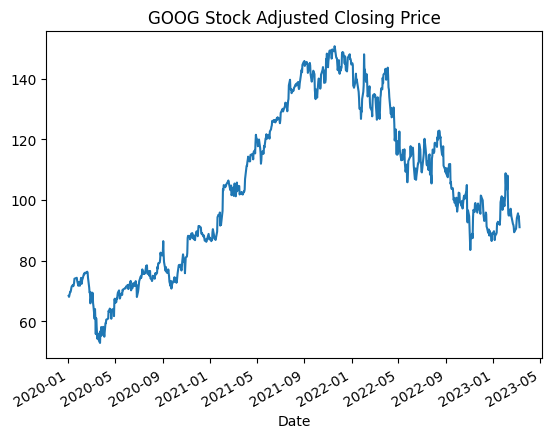

In [18]:
TODAY = datetime.date.today()

ticker="GOOG"
# Selecting Google - GOOG stock

data = yf.download(ticker, "2020-01-01", TODAY.strftime("%Y-%m-%d"))
data.head()
data["Adj Close"].plot(title=f"{ticker} Stock Adjusted Closing Price")

df_forecast = data.copy()
df_forecast.reset_index(inplace=True)
df_forecast["ds"] = df_forecast["Date"]
df_forecast["y"] = df_forecast["Adj Close"]
df_forecast = df_forecast[["ds", "y"]]
df_forecast

model = Prophet()
model.fit(df_forecast)

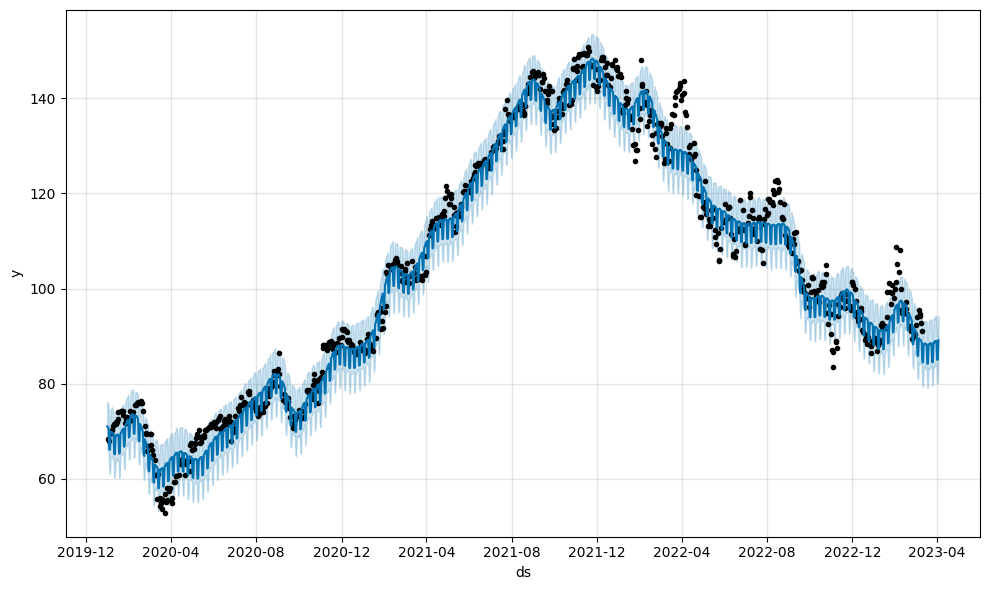

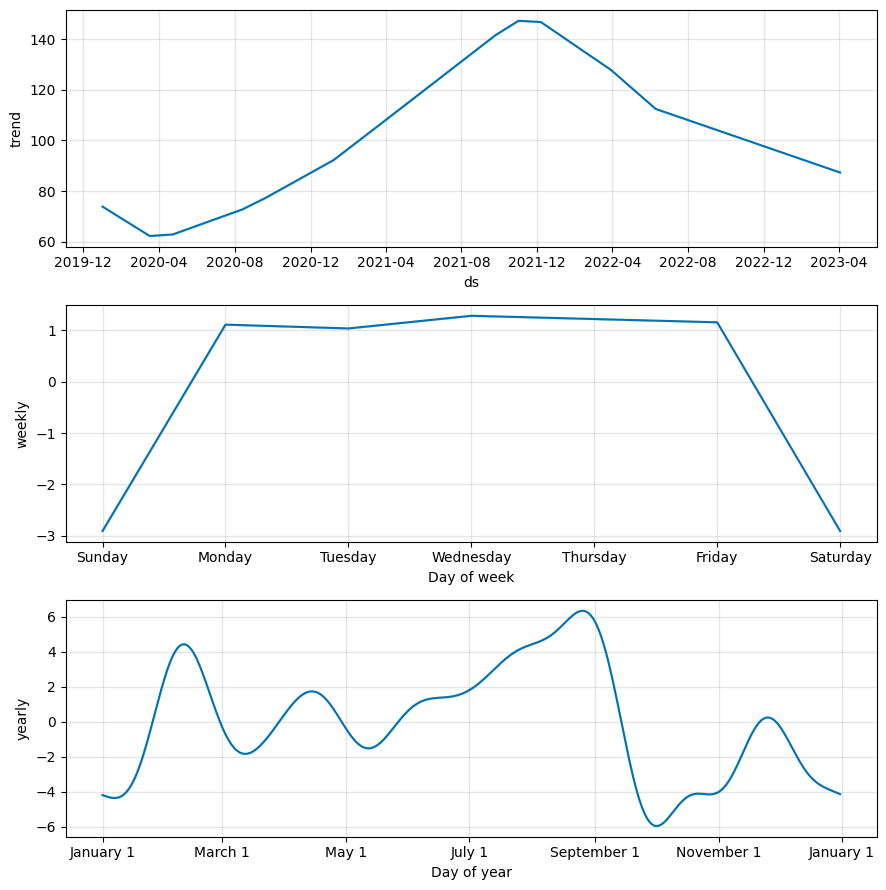

In [19]:
ticker="GOOG"
days=21 #Predicting for the next 21 days

future = TODAY + datetime.timedelta(days=days)

dates = pd.date_range(start="2020-01-01", end=future.strftime("%m/%d/%Y"),)
df = pd.DataFrame({"ds": dates})

forecast = model.predict(df)

model.plot(forecast).savefig(f"{ticker}_plot.png")
model.plot_components(forecast).savefig(f"{ticker}_plot_components.png")

In [20]:
prediction_list = forecast.tail(days).to_dict("records")

output = {}
for data in prediction_list:
    date = data["ds"].strftime("%m/%d/%Y")
    output[date] = data["trend"]
    
print(output)

{'03/14/2023': 89.0388185862562, '03/15/2023': 88.95437285729659, '03/16/2023': 88.869927128337, '03/17/2023': 88.7854813993774, '03/18/2023': 88.7010356704178, '03/19/2023': 88.61658994145822, '03/20/2023': 88.53214421249862, '03/21/2023': 88.44769848353901, '03/22/2023': 88.36325275457942, '03/23/2023': 88.27880702561981, '03/24/2023': 88.19436129666023, '03/25/2023': 88.10991556770064, '03/26/2023': 88.02546983874103, '03/27/2023': 87.94102410978144, '03/28/2023': 87.85657838082184, '03/29/2023': 87.77213265186224, '03/30/2023': 87.68768692290263, '03/31/2023': 87.60324119394302, '04/01/2023': 87.51879546498344, '04/02/2023': 87.43434973602385, '04/03/2023': 87.34990400706424}
